## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
from skimage.filters import threshold_otsu

In [2]:
pixel_res = 1.17 # micrometer per pixel
def transform_ax2(img):
    img = np.fliplr(img)
    img = np.rot90(img)
    return img

In [3]:
Vp = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_y_pred', tiff = True).read_full()
Vx = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_x_rec', tiff = True).read_full()
Vp_mask = DataFile('/data02/MyArchive/aisteer_3Dencoders/tmp_data/test_y_surf', tiff = True).read_full()


##################################################
Found existing tiff folder: test_y_pred
Dataset shape: (896, 2176, 2176)

##################################################
Found existing tiff folder: test_x_rec
Dataset shape: (896, 2176, 2176)

##################################################
Found existing tiff folder: test_y_surf
Dataset shape: (896, 2176, 2176)


In [4]:
imx = viewer.get_orthoplanes(vol = Vx)
imp = viewer.get_orthoplanes(vol = Vp)
imm = viewer.get_orthoplanes(vol = Vp_mask)

(-0.5, 2175.5, 2175.5, -0.5)

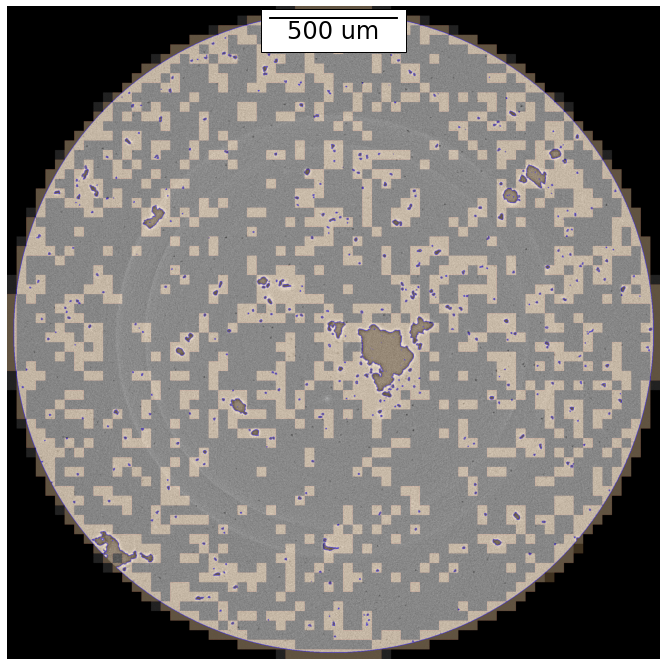

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0], imp[0], ax, color =[0,0,255])
ax.imshow(imm[0], cmap = 'copper', alpha = 0.25)
viewer.add_scalebar(ax, 500, 1.17, loc = 'upper center', fontsize = 24)
ax.axis('off')

<AxesSubplot:>

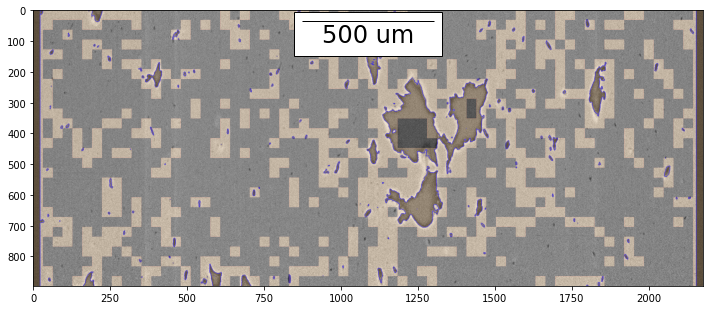

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1], imp[1], ax, color =[0,0,255])
ax.imshow(imm[1], cmap = 'copper', alpha = 0.25)
viewer.add_scalebar(ax, 500, 1.17, loc = 'upper center', fontsize = 24)
# ax.axis('off')

(-0.5, 895.5, 2175.5, -0.5)

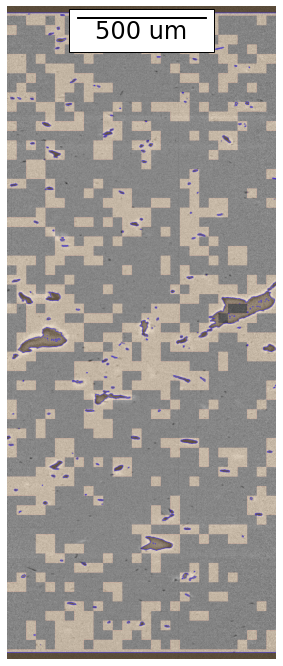

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2]), transform_ax2(imp[2]), ax, color =[0,0,255])
ax.imshow(transform_ax2(imm[2]), cmap = 'copper', alpha = 0.25)
viewer.add_scalebar(ax, 500, 1.17, loc = 'upper center', fontsize = 24)
ax.axis('off')

## TROUBLESHOOTING

<AxesSubplot:>

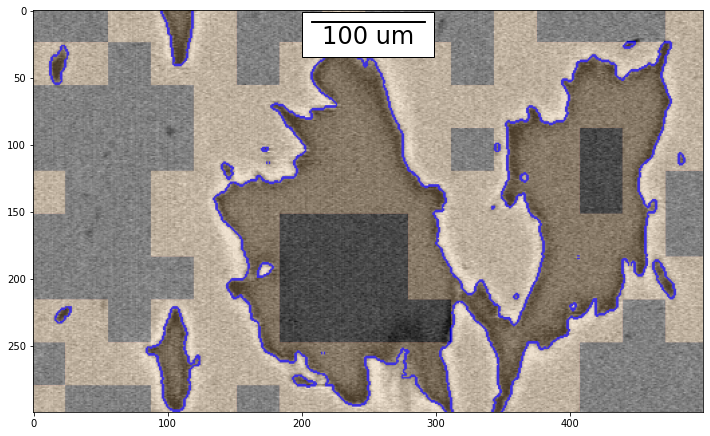

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[1][200:500,1000:1500], imp[1][200:500,1000:1500], ax, color =[0,0,255])
ax.imshow(imm[1][200:500,1000:1500], cmap = 'copper', alpha = 0.25)
viewer.add_scalebar(ax, 100, 1.17, loc = 'upper center', fontsize = 24)
# ax.axis('off')

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

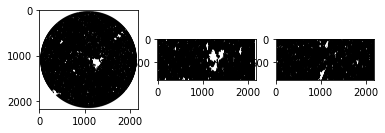

In [9]:
viewer.view_midplanes(vol = Vp)

(-0.5, 499.5, 499.5, -0.5)

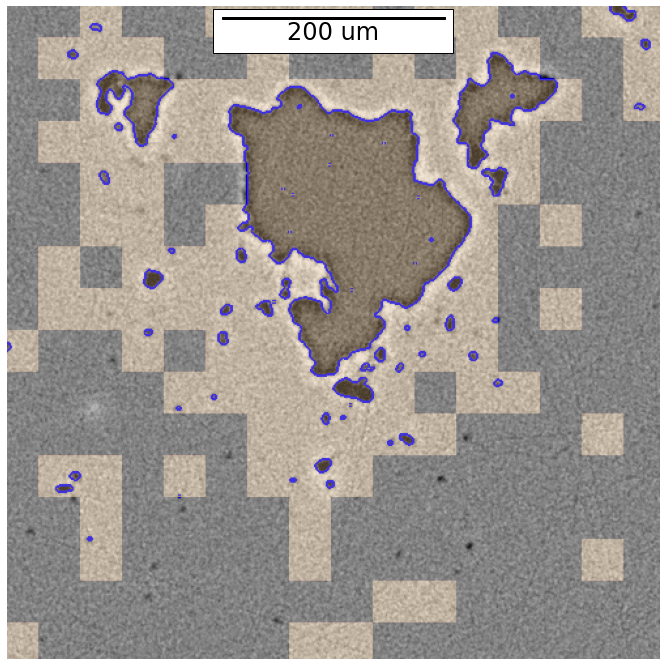

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(imx[0][1000:1500,1000:1500], imp[0][1000:1500,1000:1500], ax, color =[0,0,255])
ax.imshow(imm[0][1000:1500,1000:1500], cmap = 'copper', alpha = 0.25)
viewer.add_scalebar(ax, 200, 1.17, loc = 'upper center', fontsize = 24)
ax.axis('off')

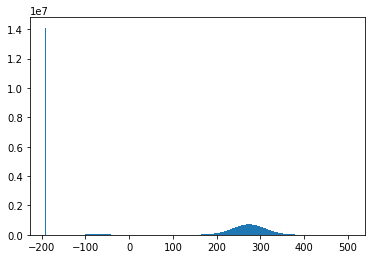

In [11]:
h = plt.hist(Vx[::4,::4,::4].reshape(-1), bins = 500)

<AxesSubplot:>

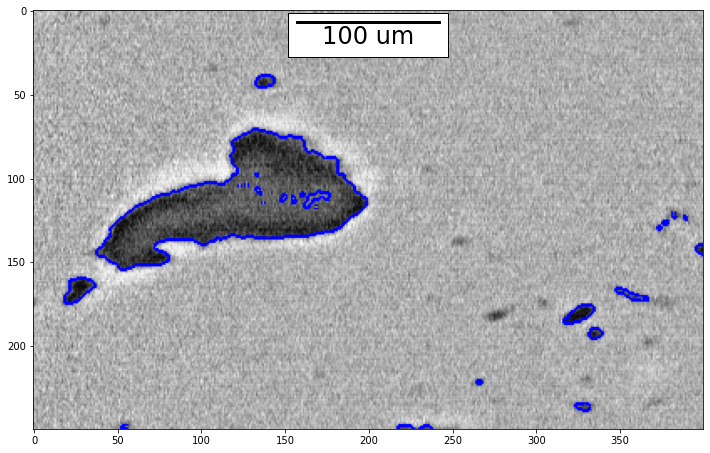

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
viewer.edge_plot(transform_ax2(imx[2][0:400,1000:1250]), transform_ax2(imp[2][0:400,1000:1250]), ax, color =[0,0,255])
# ax.imshow(transform_ax2(imm[2][0:400,1000:1250]), cmap = 'copper', alpha = 0.25)
viewer.add_scalebar(ax, 100, 1.17, loc = 'upper center', fontsize = 24)
# ax.axis('off')